In [11]:
!pip install pydicom

In [1]:
# !pip install Pillow
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mid_path_dict = {'mid_pth_mass_train' : 'manifest-LyDgOQGl3853937313152078328',
                 'mid_pth_calc_train' : 'manifest-SFgGWyWU652685503970928670',
                 'mid_pth_mass_test' : 'manifest-OlX3eVq41551709337535597984',
                 'mid_pth_calc_test' : 'manifest-JnaTC0xa8206077746049065924'}    




In [3]:
df_mass_train = pd.read_csv('mass_case_description_train_set.csv') # has target
metadata_mass_train = pd.read_csv('data_cbis/manifest-LyDgOQGl3853937313152078328/metadata.csv') #metadata for image paths

df_calc_train = pd.read_csv('calc_case_description_train_set.csv')# has target
metadata_calc_train = pd.read_csv('data_cbis/manifest-SFgGWyWU652685503970928670/metadata.csv')



In [4]:

df_mass_test = pd.read_csv('mass_case_description_test_set.csv')# has target
metadata_mass_test = pd.read_csv('data_cbis/manifest-OlX3eVq41551709337535597984/metadata.csv')



df_calc_test = pd.read_csv('calc_case_description_test_set.csv')# has target
metadata_calc_test = pd.read_csv('data_cbis/manifest-JnaTC0xa8206077746049065924/metadata.csv')



##### Extract the target variable from datasets of massa and calc

In [5]:
def preprocess_target(df):
    to_keep = ['patient_id', 'pathology']
    df = df[to_keep].drop_duplicates()
    df['pathology_encoded'] = df['pathology'].apply(lambda x: 'MALIGNANT' if x == 'MALIGNANT' else 'BENIGN')
    return df



In [6]:
df_mass_train = preprocess_target(df_mass_train)
df_mass_test = preprocess_target(df_mass_test)


df_calc_train = preprocess_target(df_calc_train)
df_calc_test = preprocess_target(df_calc_test)


In [7]:
print(df_mass_train.shape)
print(df_mass_test.shape)


(704, 3)
(206, 3)


In [8]:
print(df_calc_train.shape)
print(df_calc_test.shape)


(616, 3)
(154, 3)


In [9]:
df_mass_calc_train = pd.concat([df_mass_train,df_calc_train]).drop_duplicates().sort_values(by='patient_id').reset_index(drop=True)
df_mass_calc_test = pd.concat([df_mass_test,df_calc_test]).drop_duplicates().sort_values(by='patient_id').reset_index(drop=True)

#### preprocess the metadata

In [10]:
def preprocess_metadata(metadata,mid_pth):
    metadata['file_location'] = metadata['File Location'].apply(lambda x: f'data_cbis\\{mid_path_dict[mid_pth]}' + x[1:]+'\\')
    fin_cropped_img_paths = []

    for base_path in metadata['file_location']:
        img_list = os.listdir(base_path)
        for img in img_list:
            # Build image path
            pth = base_path+img
            # Load the DICOM file
            dcm = pydicom.dcmread(pth)
            if dcm.pixel_array.dtype ==np.uint16:
                fin_cropped_img_paths.append(pth)
    print(f'there are {len(fin_cropped_img_paths)} images in {mid_pth}')
    return fin_cropped_img_paths
        


In [128]:
metadata_mass_train_img_paths = preprocess_metadata(metadata_mass_train , 'mid_pth_mass_train')
metadata_mass_train_img_paths_df = pd.DataFrame({'img_paths':metadata_mass_train_img_paths})
metadata_mass_train_img_paths_df.to_csv('mass_train_img_paths.csv')

there are 1318 images in mid_pth_mass_train


In [147]:
metadata_mass_test_img_paths = preprocess_metadata(metadata_mass_test , 'mid_pth_mass_test')
metadata_mass_test_img_paths_df = pd.DataFrame({'img_paths':metadata_mass_test_img_paths})
metadata_mass_test_img_paths_df.to_csv('mass_test_img_paths.csv')

there are 378 images in mid_pth_mass_test


In [14]:
metadata_calc_train_img_paths = preprocess_metadata(metadata_calc_train , 'mid_pth_calc_train')
metadata_calc_train_img_paths_df = pd.DataFrame({'img_paths':metadata_calc_train_img_paths})
metadata_clac_train_img_paths_df.to_csv('calc_train_img_paths.csv')

In [15]:
metadata_calc_test_img_paths = preprocess_metadata(metadata_calc_test , 'mid_pth_calc_test')
metadata_calc_test_img_paths_df = pd.DataFrame({'img_paths':metadata_calc_test_img_paths})


there are 319 images in mid_pth_calc_test


In [16]:
metadata_calc_test_img_paths_df.to_csv('calc_test_img_paths.csv')

In [17]:
metadata_mass_train_img_paths_df = pd.read_csv('mass_train_img_paths.csv')
metadata_mass_test_img_paths_df = pd.read_csv('mass_test_img_paths.csv')

metadata_calc_train_img_paths_df = pd.read_csv('calc_train_img_paths.csv')
metadata_calc_test_img_paths_df = pd.read_csv('calc_test_img_paths.csv')

In [19]:
metadata_mass_calc_train_img_paths_df = pd.concat([metadata_mass_train_img_paths_df , metadata_calc_train_img_paths_df]).reset_index(drop=True)
metadata_mass_calc_test_img_paths_df = pd.concat([metadata_mass_test_img_paths_df , metadata_calc_test_img_paths_df]).reset_index(drop=True)

##### Extract patient_id

In [20]:
pattern = r'(P_\d+)'
metadata_mass_calc_train_img_paths_df['patient_id'] = metadata_mass_calc_train_img_paths_df['img_paths'].str.extract(pattern)
metadata_mass_calc_test_img_paths_df['patient_id'] = metadata_mass_calc_test_img_paths_df['img_paths'].str.extract(pattern)


In [21]:
metadata_mass_calc_train_img_paths_df.head()

,Unnamed: 0,img_paths,patient_id
0,0,data_cbis\manifest-LyDgOQGl3853937313152078328...,P_00001
1,1,data_cbis\manifest-LyDgOQGl3853937313152078328...,P_00004
2,2,data_cbis\manifest-LyDgOQGl3853937313152078328...,P_00001
3,3,data_cbis\manifest-LyDgOQGl3853937313152078328...,P_00004
4,4,data_cbis\manifest-LyDgOQGl3853937313152078328...,P_00009


In [22]:
metadata_mass_calc_test_img_paths_df.head()

,Unnamed: 0,img_paths,patient_id
0,0,data_cbis\manifest-OlX3eVq41551709337535597984...,P_00016
1,1,data_cbis\manifest-OlX3eVq41551709337535597984...,P_00017
2,2,data_cbis\manifest-OlX3eVq41551709337535597984...,P_00016
3,3,data_cbis\manifest-OlX3eVq41551709337535597984...,P_00032
4,4,data_cbis\manifest-OlX3eVq41551709337535597984...,P_00017


##### Add target

In [23]:
mass_calc_fin_train = pd.merge(metadata_mass_calc_train_img_paths_df,df_mass_calc_train,how='inner',on='patient_id')
mass_calc_fin_train= mass_calc_fin_train[['img_paths','pathology_encoded']]
mass_calc_fin_test = pd.merge(metadata_mass_calc_test_img_paths_df,df_mass_calc_test,how='inner',on='patient_id')
mass_calc_fin_test= mass_calc_fin_test[['img_paths','pathology_encoded']]

In [24]:
print(mass_calc_fin_train.shape)
print(mass_calc_fin_test.shape)

(3085, 2)
(731, 2)


In [25]:
mass_calc_fin_train.head()

,img_paths,pathology_encoded
0,data_cbis\manifest-LyDgOQGl3853937313152078328...,MALIGNANT
1,data_cbis\manifest-LyDgOQGl3853937313152078328...,MALIGNANT
2,data_cbis\manifest-LyDgOQGl3853937313152078328...,BENIGN
3,data_cbis\manifest-LyDgOQGl3853937313152078328...,BENIGN
4,data_cbis\manifest-LyDgOQGl3853937313152078328...,BENIGN


In [26]:
mass_calc_fin_train['pathology_encoded'].value_counts()

BENIGN       1801
MALIGNANT    1284
Name: pathology_encoded, dtype: int64

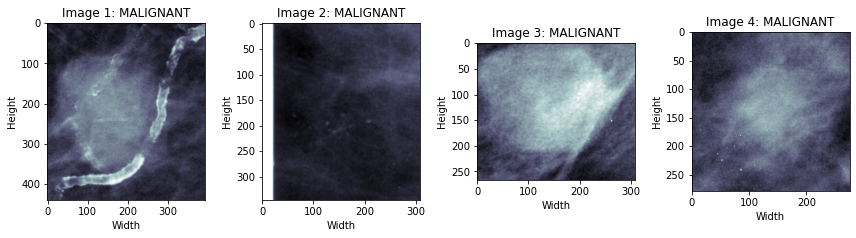

In [28]:
plt.figure(figsize=(12, 4))
# Loop through 5 random examples
for index, row in mass_calc_fin_train.sample(4).reset_index(drop=True).iterrows():
    # Load the DICOM file
    dcm = pydicom.dcmread(row['img_paths'])
    
    # Get image data
    image_data = dcm.pixel_array
    
    # Display the image
    plt.subplot(1, 4, index + 1)
    plt.imshow(image_data, cmap=plt.cm.bone)
    plt.title(f"Image {index+1}: {row['pathology_encoded']}")
    plt.xlabel("Width")
    plt.ylabel("Height")

plt.tight_layout()
plt.show()
    


In [29]:
dcm = pydicom.dcmread(mass_calc_fin_train['img_paths'][0])

# Check the shape of the pixel_array
print("Shape of the DICOM image:", dcm.pixel_array.shape)

Shape of the DICOM image: (515, 431)


In [30]:
import pandas as pd
import pydicom
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [25]:
# !pip install scikit-image
!pip install scikit-image

  Using cached scikit_image-0.17.2-cp36-cp36m-win_amd64.whl (11.5 MB)
  Using cached tifffile-2020.9.3-py3-none-any.whl (148 kB)
  Using cached PyWavelets-1.1.1-cp36-cp36m-win_amd64.whl (4.2 MB)
  Using cached imageio-2.15.0-py3-none-any.whl (3.3 MB)


  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0


In [32]:
from skimage.transform import resize


# Example preprocessing function
def preprocess_image(image_path):
    dcm = pydicom.dcmread(image_path)
    image = dcm.pixel_array
    image = image / np.max(image)  # Normalize
#     image = np.resize(image, (50, 50, 3))  # Resize
       # Resize while maintaining spatial relations
    image_resized = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
    
    # Ensure that the image has an extra dimension for channel
    image_with_channel = np.expand_dims(image_resized, axis=-1)
    
    
#     image = np.expand_dims(image, axis=-1)
    return image_with_channel

# Load and preprocess images
images = np.array([preprocess_image(fp) for fp in mass_calc_fin_train['img_paths']])
X_test_eval = np.array([preprocess_image(fp) for fp in mass_calc_fin_test['img_paths']])




In [34]:
def map_target(df):
    label_mapping = {'BENIGN': 0, 'MALIGNANT': 1}
    df['labels_encoded'] = df['pathology_encoded'].map(label_mapping)
    # One-hot encode
    labels_one_hot = to_categorical(df['labels_encoded'])
    return labels_one_hot

In [36]:
labels = map_target(mass_calc_fin_train)
y_test_eval = map_target(mass_calc_fin_test)

In [37]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)


In [38]:
model = Sequential()

# add layers
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # flatten feature maps
model.add(Dense(128, activation='relu')) # add fully connected layers
model.add(Dense(2, activation='softmax')) # output layer

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               991360    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=32,verbose=1)


Train on 2468 samples, validate on 617 samples
Epoch 1/40
2468/2468 [==============================] - 11s 5ms/sample - loss: 0.6989 - accuracy: 0.5648 - val_loss: 0.6790 - val_accuracy: 0.5948
Epoch 2/40
2468/2468 [==============================] - 9s 4ms/sample - loss: 0.6839 - accuracy: 0.5810 - val_loss: 0.6812 - val_accuracy: 0.5948
Epoch 3/40
2468/2468 [==============================] - 9s 4ms/sample - loss: 0.6799 - accuracy: 0.5827 - val_loss: 0.6785 - val_accuracy: 0.5754
Epoch 4/40
2468/2468 [==============================] - 9s 4ms/sample - loss: 0.6750 - accuracy: 0.5887 - val_loss: 0.6719 - val_accuracy: 0.5835
Epoch 5/40
2468/2468 [==============================] - 10s 4ms/sample - loss: 0.6771 - accuracy: 0.5887 - val_loss: 0.6597 - val_accuracy: 0.5916
Epoch 6/40
2468/2468 [==============================] - 9s 4ms/sample - loss: 0.6608 - accuracy: 0.5900 - val_loss: 0.6501 - val_accuracy: 0.5818
Epoch 7/40
2468/2468 [==============================] - 10s 4ms/sample - lo

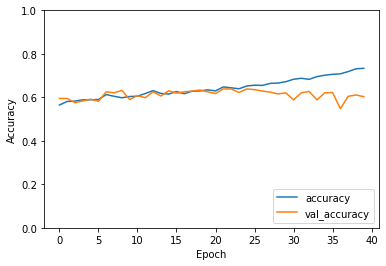

In [41]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(true_labels, predictions, label_names):
    """
    Display confusion matrix and classification report.

    Parameters:
    - true_labels: Actual labels
    - predictions: Model's predictions
    - label_names: Names of the classes
    """
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Compute and print classification report
    cr = classification_report(true_labels, predictions, target_names=label_names)
    print("Classification Report:\n", cr)


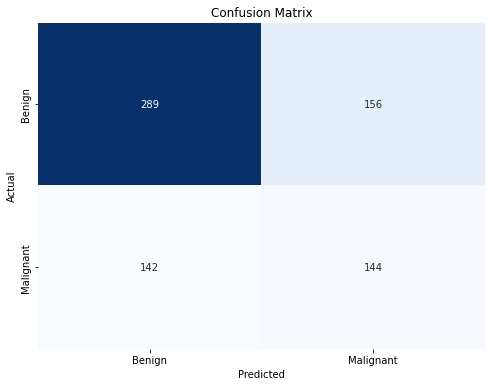

Classification Report:
               precision    recall  f1-score   support

      Benign       0.67      0.65      0.66       445
   Malignant       0.48      0.50      0.49       286

    accuracy                           0.59       731
   macro avg       0.58      0.58      0.58       731
weighted avg       0.60      0.59      0.59       731



In [43]:
import numpy as np
from tensorflow.keras.models import load_model


# Assume X_test, y_test are your testing data and labels
predictions_prob = model.predict(X_test_eval)
predictions = np.argmax(predictions_prob, axis=1)
true_labels = np.argmax(y_test_eval, axis=1)

# Class names
label_names = ['Benign', 'Malignant']

# Evaluate
evaluate_model(true_labels, predictions, label_names)


In [44]:
# Define model
model_1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # 2 units for 'benign' and 'malignant'
])

# Compile model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)             

In [45]:

# Train model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)



Train on 2468 samples, validate on 617 samples
Epoch 1/100
2468/2468 [==============================] - 22s 9ms/sample - loss: 0.6893 - accuracy: 0.5806 - val_loss: 0.6782 - val_accuracy: 0.5948
Epoch 2/100
2468/2468 [==============================] - 22s 9ms/sample - loss: 0.6807 - accuracy: 0.5827 - val_loss: 0.6700 - val_accuracy: 0.5948
Epoch 3/100
2468/2468 [==============================] - 444s 180ms/sample - loss: 0.6682 - accuracy: 0.5823 - val_loss: 0.6719 - val_accuracy: 0.5981
Epoch 4/100
2468/2468 [==============================] - 22s 9ms/sample - loss: 0.6671 - accuracy: 0.5831 - val_loss: 0.6695 - val_accuracy: 0.5851
Epoch 5/100
2468/2468 [==============================] - 19s 8ms/sample - loss: 0.6586 - accuracy: 0.5810 - val_loss: 0.6310 - val_accuracy: 0.6013
Epoch 6/100
2468/2468 [==============================] - 20s 8ms/sample - loss: 0.6432 - accuracy: 0.5989 - val_loss: 0.6272 - val_accuracy: 0.5948
Epoch 7/100
2468/2468 [==============================] - 19s 8

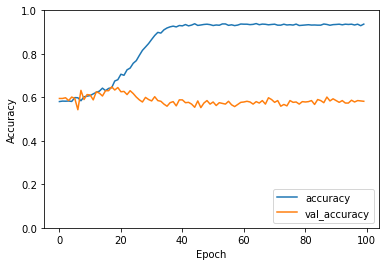

In [46]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


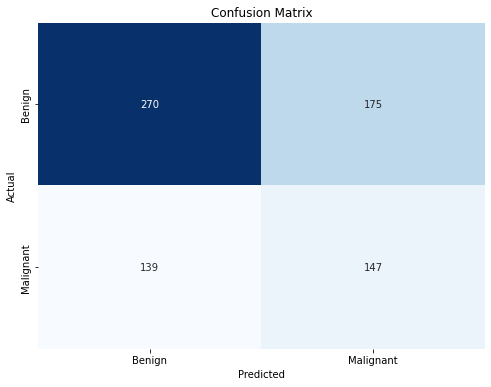

Classification Report:
               precision    recall  f1-score   support

      Benign       0.66      0.61      0.63       445
   Malignant       0.46      0.51      0.48       286

    accuracy                           0.57       731
   macro avg       0.56      0.56      0.56       731
weighted avg       0.58      0.57      0.57       731



In [47]:
import numpy as np
from tensorflow.keras.models import load_model


# Assume X_test, y_test are your testing data and labels
predictions_prob = model_1.predict(X_test_eval)
predictions = np.argmax(predictions_prob, axis=1)
true_labels = np.argmax(y_test_eval, axis=1)

# Class names
label_names = ['Benign', 'Malignant']

# Evaluate
evaluate_model(true_labels, predictions, label_names)
